Look at power spectra of select bursts before during and after amplitude changes, in addition to during lake drainages

In [1]:
# Load libraries
import sys
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import pickle

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    20:24:45 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    20:24:45 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    20:24:45 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


We start with large amplitude changes

In [2]:
with open('../chirp_processing/A11_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [3]:
time_to_interp = pd.date_range("2022-10-28 0:00", "2022-10-30 0:00", freq="15min")
interp_profiles = winter.interp(time=time_to_interp,method='linear')


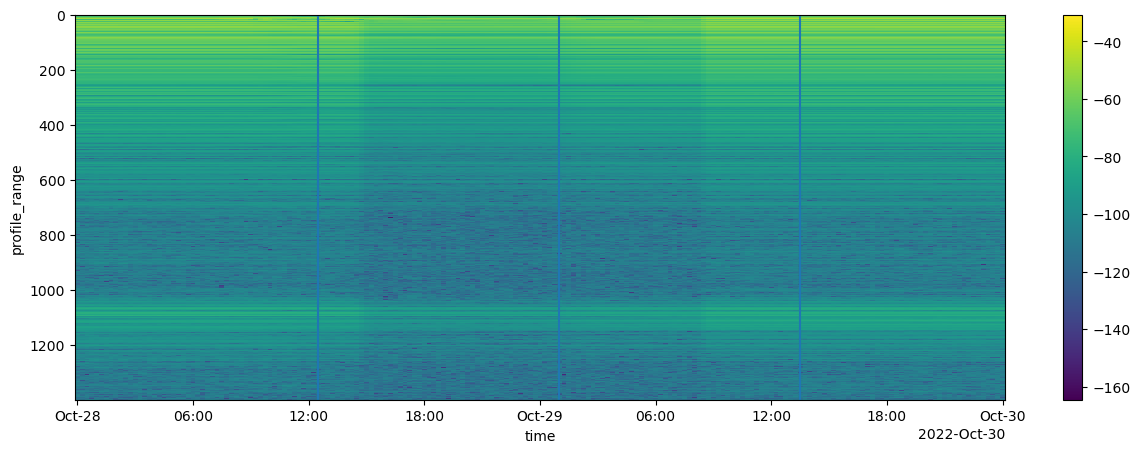

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='time')
ax.axvline(interp_profiles.isel(time=[50]).time)
ax.axvline(interp_profiles.isel(time=[100]).time)
ax.axvline(interp_profiles.isel(time=[150]).time)

ax.invert_yaxis()
#ax.legend()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

Text(0.5, 1.0, 'Phase')

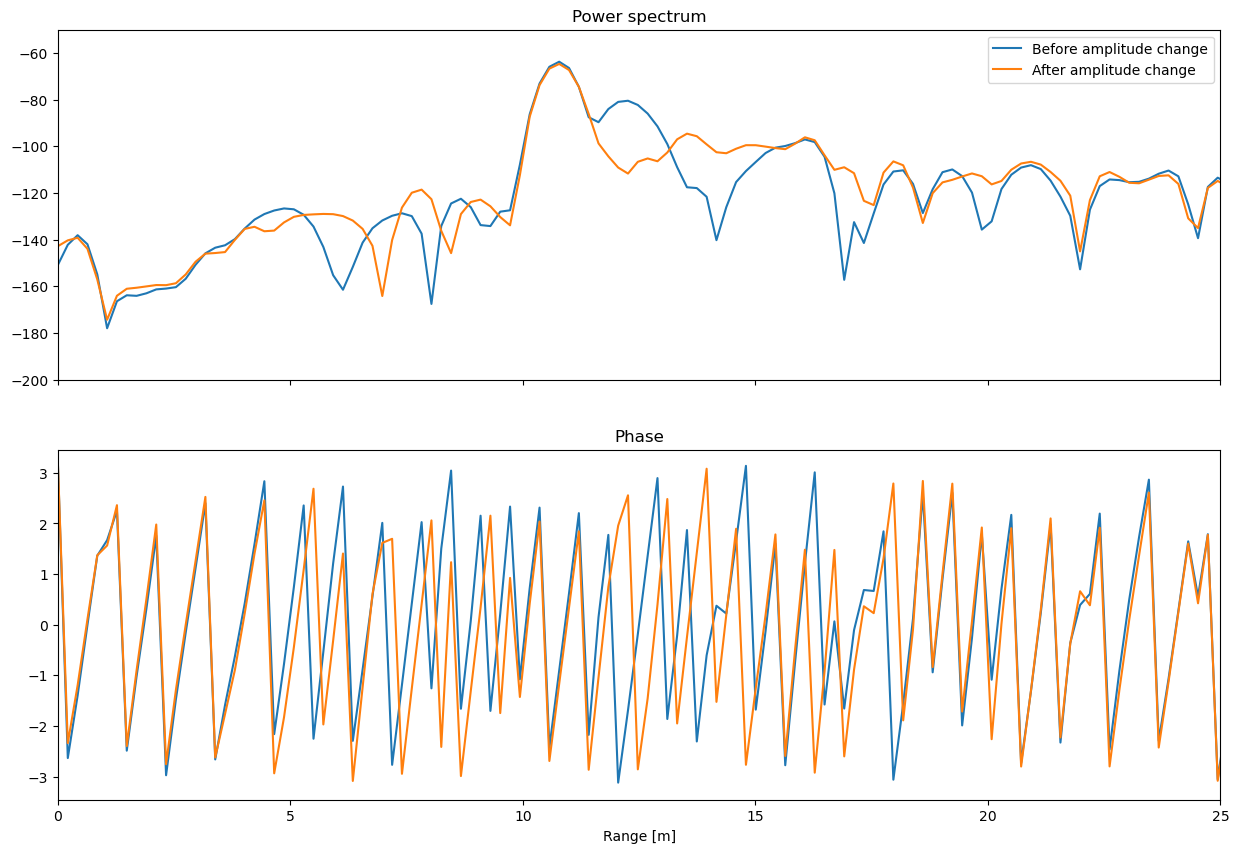

In [18]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(15,10))
xa.dB(abs(interp_profiles.isel(time=50))**2).plot(ax=axs[0],label='Before amplitude change')
#xa.dB(abs(interp_profiles.isel(time=100))**2).plot(ax=axs[0],label='During amplitude change')
xa.dB(abs(interp_profiles.isel(time=150))**2).plot(ax=axs[0],label='After amplitude change')

#xa.dB(abs(interp_profiles.isel(time=190))**2).plot(ax=ax,label='After')
axs[0].set_xlim([0,25])
axs[0].set_ylim([-200,-50])
axs[0].set_title('Power spectrum')
axs[0].legend()
axs[0].set_xlabel('')

axs[1].plot(interp_profiles.isel(time=50).profile_range,np.angle(interp_profiles.isel(time=50)),label='Before amplitude change')
#axs[1].plot(interp_profiles.isel(time=100).profile_range,np.angle(interp_profiles.isel(time=100)),label='Before amplitude change')
axs[1].plot(interp_profiles.isel(time=150).profile_range,np.angle(interp_profiles.isel(time=150)),label='Before amplitude change')
axs[1].set_xlabel('Range [m]')
axs[1].set_title('Phase')


Plotting whole sequence

(200.0, 0.0)

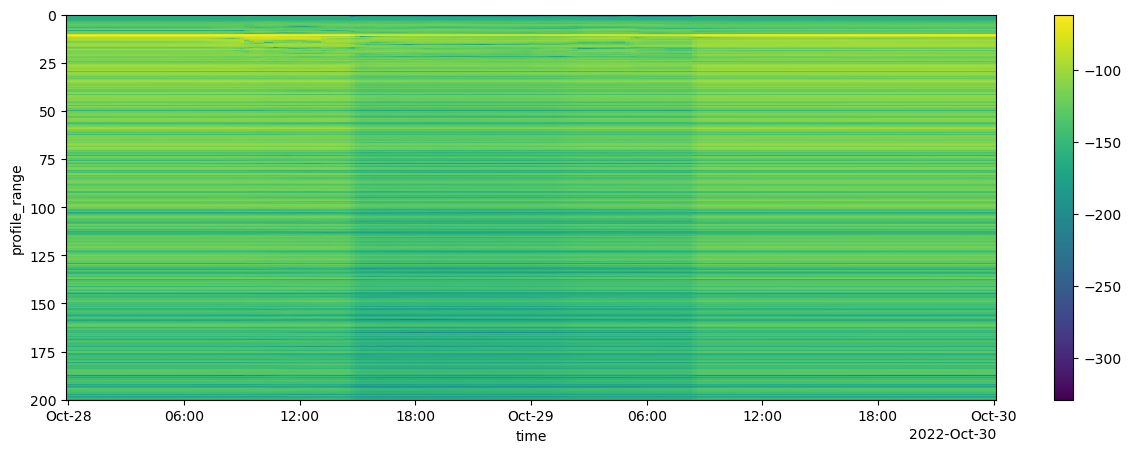

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(abs(interp_profiles)**2).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)
plt.ylim([200,0])

Smaller variations

In [38]:
time_to_interp = pd.date_range("2023-04-10 6:00", "2023-04-12 6:00", freq="15min")
interp_profiles = winter.interp(time=time_to_interp,method='linear')


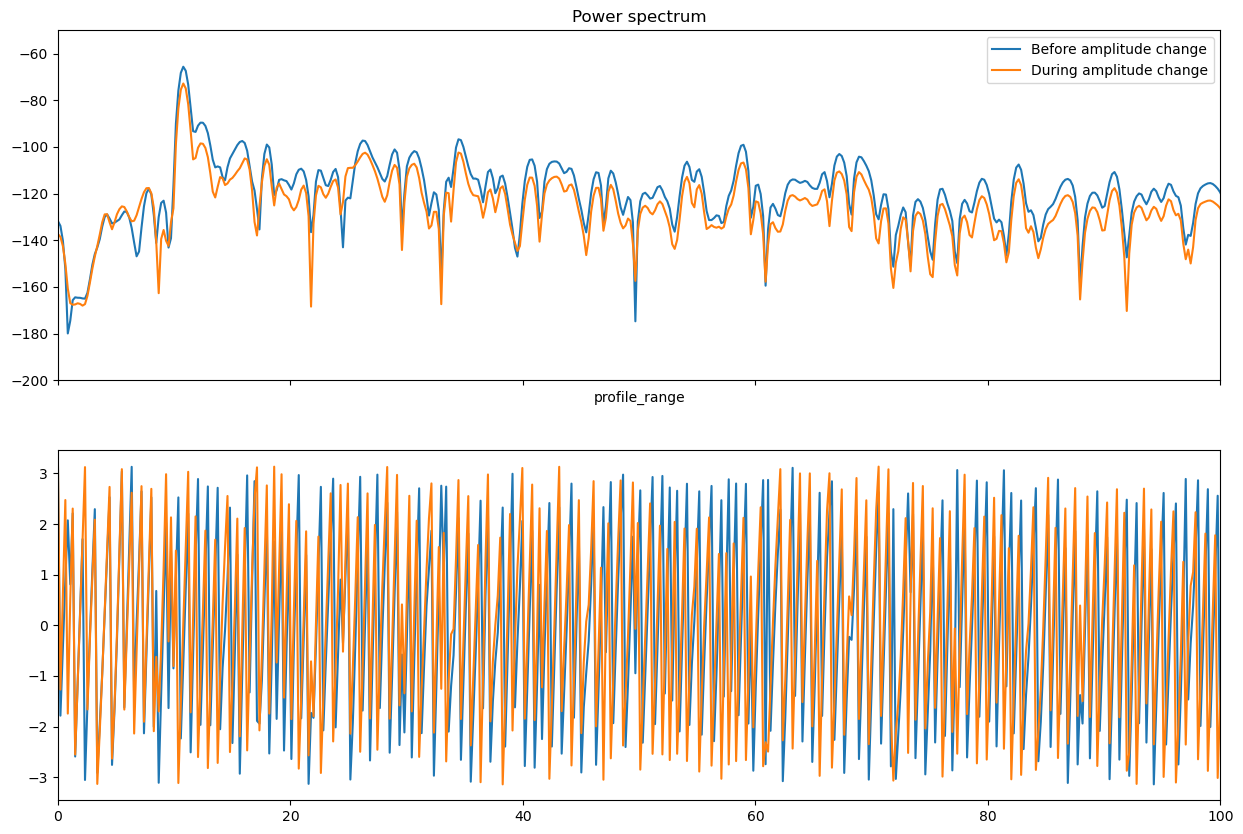

In [39]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(15,10))
xa.dB(abs(interp_profiles.isel(time=0))**2).plot(ax=axs[0],label='Before amplitude change')
xa.dB(abs(interp_profiles.isel(time=48))**2).plot(ax=axs[0],label='During amplitude change')
#xa.dB(abs(interp_profiles.isel(time=190))**2).plot(ax=ax,label='After')
axs[0].set_xlim([0,100])
axs[0].set_ylim([-200,-50])
axs[0].set_title('Power spectrum')
axs[0].legend()

axs[1].plot(interp_profiles.isel(time=0).profile_range,np.angle(interp_profiles.isel(time=0)),label='Before amplitude change')
axs[1].plot(interp_profiles.isel(time=48).profile_range,np.angle(interp_profiles.isel(time=48)),label='Before amplitude change')


(200.0, 0.0)

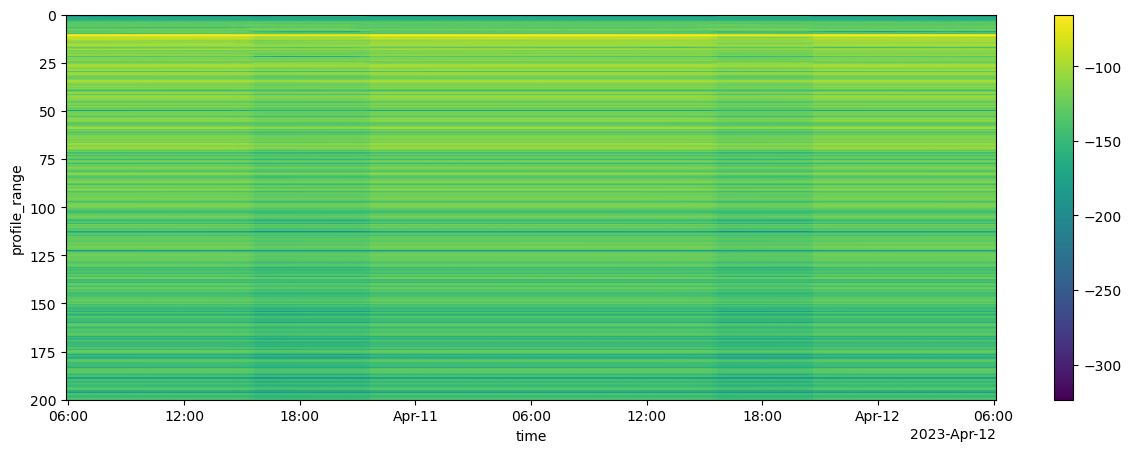

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(abs(interp_profiles)**2).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)
plt.ylim([200,0])